# Exploratory Data Analysis

## List of contents

+ Notebook set up 
+ [Introduction](#introduction)
    + Stroke
    + The International Stroke Trial
        + Treatment
    + Medical Triage
    + Aims and objectives
+ [The participants](#the-participants)
    + Age and sex
    + Health status at randomization
    + Diagnosis
+ [Information after 14 days](#information-after-14-days)
    + Recurrent Stroke
    + State of discharge and place of discharge
    + Death and cause of death
+ [Information after 6 months](#information-after-6-months)
    + Current status
    + Death and cause of death
+ [Summary](#summary)




-------

## Notebook set up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as pat

In [2]:
df = pd.read_csv('data/IST_corrected_clean.csv',  index_col= [0])


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18779 entries, 0 to 19434
Columns: 113 entries, HOSPNUM to RDISCH14
dtypes: float64(16), int64(29), object(68)
memory usage: 16.3+ MB


In [4]:
# setting figuresize and label size globally
plt.rcParams['figure.figsize']=(12,8)
plt.rcParams['font.size']=14

sns.set_theme(palette = 'pastel', 
              font_scale=1.25)

In [5]:
# extracting info from categorical variables
age = df.AGE_bin.sort_values().unique().tolist()
diagstr = df.DIAGSTR.unique().tolist()
stype = df.STYPE.unique().tolist()
rdisch14 = df.RDISCH14.unique().tolist()
occode = df.OCCODE.unique().tolist()

In [6]:
df_dp = df.dropna(subset=['DPLACE'])
place = df_dp.DPLACE.unique().tolist()

In [7]:
# defining color schemes for categories
age_colors=['#c6dbef', '#9ecae1', '#6baed6', '#3182bd', '#08519c'] # blue-ish
COLOR_AGE = dict(zip(age, age_colors))
COLOR_SEX = {'F':'#a1dab4', 'M':'#2c7fb8'} #
COLOR_RATRIAL = {'Y':'#67a9cf', 'N':'#02818a'} 
diagstr_colors = ['#dd1c77', '#c994c7', '#e7e1ef']
COLOR_DIAGSTR = dict(zip(diagstr, diagstr_colors))
diagstr_colors = ['#e7e1ef', '#c994c7', '#dd1c77']
COLOR_RDISCH14 = dict(zip(rdisch14, diagstr_colors))
stype_colors = ['#f2f0f7', '#cbc9e2', '#9e9ac8', '#756bb1', '#54278f'] # violet-ish
COLOR_STYPE = dict(zip(stype, stype_colors))
occode_colors = ['#fee5d9', '#fcae91', '#fb6a4a', '#de2d26', '#a50f15']
COLOR_OCCODE = dict(zip(occode, occode_colors))
place_colors = ['#a6bddb', '#67a9cf', '#3690c0', '#02818a', '#016c59', '#014636']
COLOR_PLACE = dict(zip(place, place_colors))

In [8]:
#df.head()

------

## Introduction
### Stroke

A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications. Effective treatments can also help prevent disability from stroke.

There are **two main causes of stroke**: a blocked artery (ischaemic stroke) or leaking or bursting of a blood vessel (haemorrhagic stroke). Some people may have only a temporary disruption of blood flow to the brain, known as a transient ischaemic attack (TIA), that doesn't cause lasting symptoms [source](https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113).



### The International Stroke Trial
The International Stroke Trial (IST) was conducted from 1991 to 1996. The randomized, open trial of up to 14 days of antithrombotic therapy started as soon as possible after stroke onset. The aim was to provide reliable evidence on the safety and efficacy of aspirin and of subcutaneous heparin. More information can be found [here](https://trialsjournal.biomedcentral.com/articles/10.1186/1745-6215-12-101) and [here](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(97)04011-7/fulltext). The dataset can be downloaded from [here](https://datashare.ed.ac.uk/handle/10283/124).

The majority of the data was collected in 1994 and 1995.

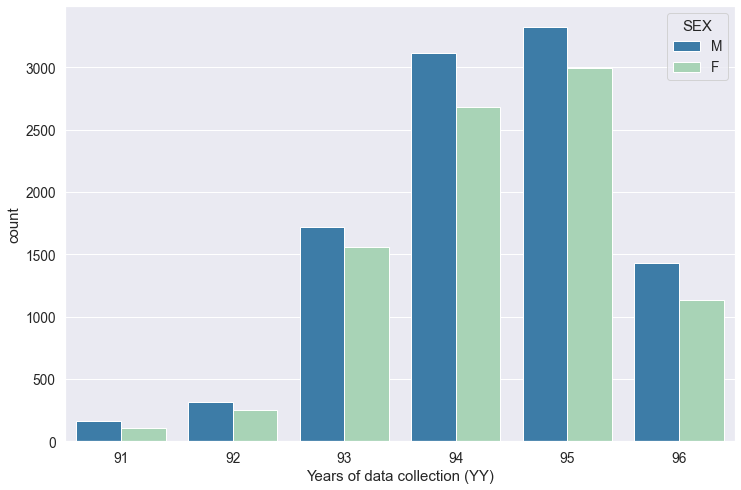

In [9]:
sns.countplot(x = df.RYEAR, hue = df.SEX, palette = COLOR_SEX).set(xlabel='Years of data collection (YY)')

plt.savefig("images/year_sex.png", bbox_inches="tight")
plt.show()

The data was collected worldwide. Though, most patients were from the UK or Italy. 

In [10]:
df.groupby(['COUNTRY_ISO', 'SEX']).size().unstack(fill_value=0)

SEX,F,M
COUNTRY_ISO,,
AR,201,301
AT,136,88
AU,234,345
BE,163,131
BR,32,43
CA,49,67
CH,759,811
CL,24,32
CZ,213,250


Overall, 461 hospitals participated in the trial.

In [11]:
df.HOSPNUM.nunique()

461

#### Treatment

Half the patients were allocated unfractionated heparin (5000 or 12,500 IU twice daily), and half were allocated "avoid heparin"; and, in a factorial design, half were allocated aspirin 300 mg daily and half "avoid aspirin".

Aspirin | | Avoid Aspirin
:------- | --- | :----
Aspirin (300 mg daily) | -- | Control
Aspirin + Low Heparin | -- | Low Heparin (5000 IU twice daily)
Aspirin + Medium Heparin | -- | Medium Heparin (12,500 IU twice daily)

Patients within the trial took the prescribed medicine for 14 days. After 14 days (of radnomization) medical staff filled out a discharge form to collect information of the current status of the patient. This form was filled out sooner if the patients was discharged sooner, transferred to another hospital or passed away. Another follow up was conducted after 6 months by the National Coordinator. We will highlight the most interesting information that was collected later on. For a detailed list of the variables, please check the document [IST_corrected_columns](IST_corrected_columns).

In [12]:
df.TREAT14.value_counts()

Control                     5626
Aspirin                     4688
Low Heparin                 2198
Medium Heparin              2137
Aspirin + Low Heparin       2132
Aspirin + Medium Heparin    1998
Name: TREAT14, dtype: int64


The main questions (and the accompanying detailed analayses) the researchers conducting the study set were as followed:

+ Death during the first two weeks and poor long-term outcome (i.e. at about six months, the patient is either dead or alive but neding help in everyday activities):
    + Comparison of all those allocated "aspirin" versus all those allocated "avoid aspirin"
        + Subdivided by prior aspirin use recorded at randomization
        + Subdivided by the hours between onset and randomization
    + Comparison of all those allocated "heparin" versus all those allocated "avoid heparin"
        + In detail: "avoid heparin" versus "low heparin" versus "medium heparin"
        + Subdivided by prior heparin use recorded at randomization
        + Subdivided by hours between onset and randomization
    + Comparison of the combination of aspirin and heparin 
        + Assessment if significantly different outcome than separate effects of aspirin and heparin

As these questions were answered in quite depth by the researchers itself, we will not go into detail about the different treatments. A short summary can be found in the document [02_IST_basic_stats](). In constrast to the original study, we did not focus on participants that suffered an ischaemic stroke. We included all patients irregardless of the diagnosis. Further, we used the information which treatment the participants received rather than to which treatment they were allocated to.

## Medical Triage

Triage is the sorting of injured or sick people by the severity of their condition or likelihood of recovery with and without treatment ([source](https://en.wikipedia.org/wiki/Triage)). The word itself stems from the French word „trier“, which means „to sort“. It originated during the reign of Napoleon when the selection (triaging) of large groups of wounded soldiers was necessary.
Nowadays, triage is implemented when a hospital is overloaded, i.e. when resources (including - and particularly - medical staff) is scarce and cannot provide the medical care needed. This ranking process allows hospitals to prioritize patients based on severity of illness or injury, with the intent of treating the sickest first.
Usually, triage may be performed by emergency medical technicians, emergency room gatekeepers, soldiers on a battlefield, or anyone with knowledge of the system during an emergency situation, such as a pandemic ([source](https://www.verywellhealth.com/medical-triage-and-how-it-works-2615132)).

## Aims and objectives

The aim of this project was to analyse the data of the International Stroke Trial and its implementation for decision support tools for medical triage. In detail, the objectives were:

+ Build a model that predicts the negative short term outcome, i.e. death after 14 days, of stroke patients.
+ Build a model that predicts the negative long term outcome, i.e. poor health condition or death after six months, of stroke patients.

The prediction of a negative outcome may help medical staff to sort patients into severe and less severe groups and thereby provide the particular care needed.

----

## The participants


### Age and sex

The age of stroke patients who suffered a stroke (and participated in the International Stroke Trial) ranged from 16 to 99 years. Though, the majority of patients were between 65 and 80 years old. In the graph we see a slight offset in the age when we compare male with female patients. Women tended to have a stroke later in their life than men. Keeping in mind that life expectancy of men (78 years) and women (83 years) differed by 5 years (Europe in 2017) this graph is not surprising ([source](https://ec.europa.eu/eurostat/web/products-eurostat-news/-/DDN-20190725-1)).

More men than women participated the study. However, currently more women than men suffer a fatal outcome after a stroke ([source](https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113)).

In [13]:
print(df.AGE.describe())
df.SEX.value_counts()

count    18779.000000
mean        71.795090
std         11.528765
min         16.000000
25%         65.000000
50%         73.000000
75%         80.000000
max         99.000000
Name: AGE, dtype: float64


M    10060
F     8719
Name: SEX, dtype: int64

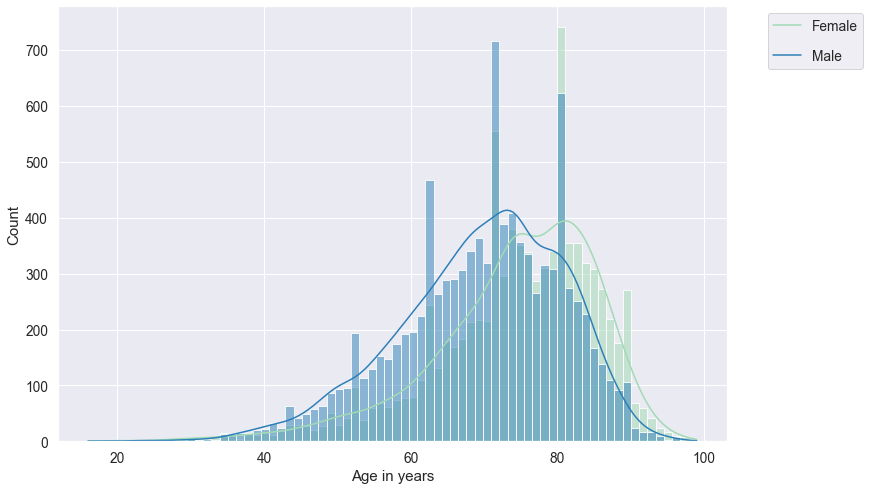

In [14]:
sns.histplot(x=df.AGE, kde=True, hue = df.SEX, palette = COLOR_SEX).set(xlabel='Age in years')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
           labels = ['Female', 'Male'], labelspacing=1.2)

plt.savefig("images/patients/age_sex.png", bbox_inches="tight")
plt.show()

### Health at randomization

There are only few parameters regarding health measurements in the dataset. These are systolic blood pressure, atrial fibrillation, deficits (caused by the stroke) and diagnosis of stroke type.

Blood pressure is usually measured in systolic blood pressure and diastolic blood pressure. If the systolic blood pressure is high and the diastolic blood pressure is low, the patient shows signs of isolated systolic hypertension. This condition can contribute to the risk of heart attakc and stroke ([source](https://www.healthline.com/health/heart-disease/high-systolic-blood-pressure#systolic-vs-diastolic)). 

  | [Systolic Blood Pressure](https://www.cdc.gov/bloodpressure/about.htm)
--- | ----:
Normal | Less than 120 mm Hg
At risk | 120 - 129 mm Hg
Hypertension | 130 mm Hg or higher 

The majority of all participants showed high values of systolic blood pressure, irregardless of sex.

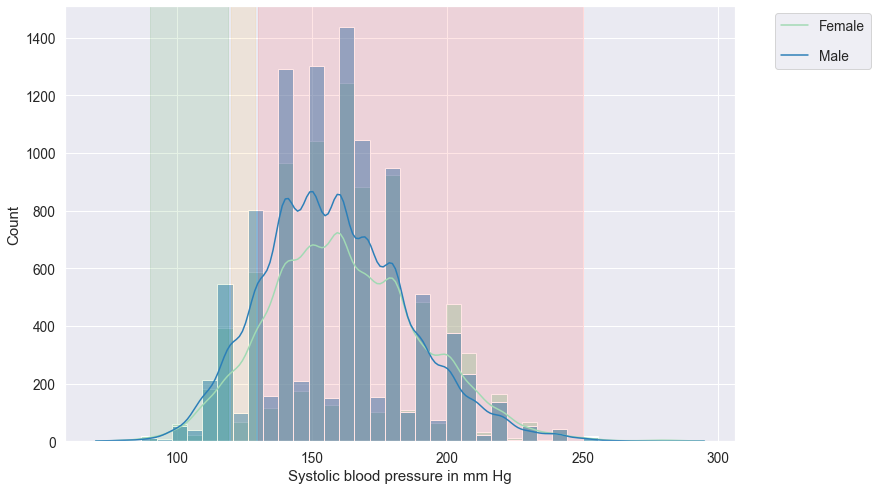

In [15]:
sns.histplot(x=df.RSBP, kde = True,  hue = df.SEX, bins = 40, palette = COLOR_SEX).set(xlabel='Systolic blood pressure in mm Hg')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
           labels = ['Female', 'Male'], labelspacing=1.2)

# highlight systolic blood pressurea
plt.axvspan(90, 119,alpha = 0.1, color = 'green')
plt.axvspan(120, 129,alpha = 0.1, color ='orange')
plt.axvspan(130, 250,alpha = 0.1, color ='red')

plt.savefig("images/patients/rsbp_sex.png", bbox_inches="tight")
plt.show()

### Atrial Fibrillation

Atrial fibrillation is an abnormal heart rhythm (arrhythmia) characterized by the rapid and irregular beating of the atrial chambers of the heart. The older the participancts were the more likely they wer eto show signs of atrial fibrillation

In [16]:
#df_af = pd.DataFrame()
group_af = df.groupby(['AGE_bin'])
group_af.RATRIAL.value_counts()

AGE_bin  RATRIAL
16 - 63  N          3597
         Y           187
64 - 70  N          2890
         Y           397
71 - 76  N          3300
         Y           641
77 - 82  N          2745
         Y           859
83 - 99  N          2198
         Y          1007
Name: RATRIAL, dtype: int64

In [17]:
print(f"--- 16 - 63 years ---")
print(f'{round((group_af.RATRIAL.value_counts()[1]/ (group_af.RATRIAL.value_counts()[0] + group_af.RATRIAL.value_counts()[1]) * 100),1)} % of participants showed signs of atrial fibrillation')
print()
print(f"--- 64 - 70 years ---")
print(f'{round((group_af.RATRIAL.value_counts()[3]/ (group_af.RATRIAL.value_counts()[2] + group_af.RATRIAL.value_counts()[3]) * 100), 1)} % of participants showed signs of atrial fibrillation')
print()
print(f"--- 71 - 76 years ---")
print(f'{round((group_af.RATRIAL.value_counts()[5]/ (group_af.RATRIAL.value_counts()[4] + group_af.RATRIAL.value_counts()[5]) * 100), 1)} % of participants showed signs of atrial fibrillation')
print()
print(f"--- 77 - 82 years ---")
print(f'{round((group_af.RATRIAL.value_counts()[7]/ (group_af.RATRIAL.value_counts()[6] + group_af.RATRIAL.value_counts()[7]) * 100), 1)} % of participants showed signs of atrial fibrillation')
print()
print(f"--- 83 - 99 years ---")
print(f'{round((group_af.RATRIAL.value_counts()[9]/ (group_af.RATRIAL.value_counts()[8] + group_af.RATRIAL.value_counts()[9]) * 100), 1)} % of participants showed signs of atrial fibrillation')

--- 16 - 63 years ---
4.9 % of participants showed signs of atrial fibrillation

--- 64 - 70 years ---
12.1 % of participants showed signs of atrial fibrillation

--- 71 - 76 years ---
16.3 % of participants showed signs of atrial fibrillation

--- 77 - 82 years ---
23.8 % of participants showed signs of atrial fibrillation

--- 83 - 99 years ---
31.4 % of participants showed signs of atrial fibrillation


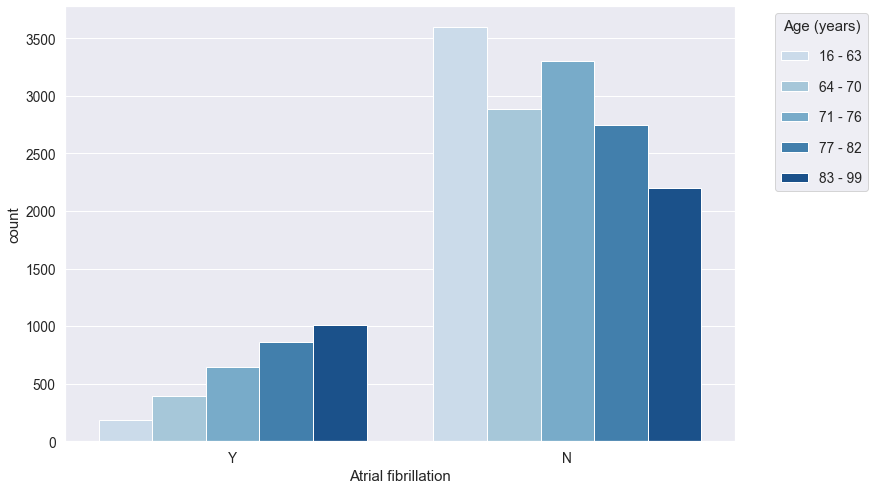

In [18]:
ax = sns.countplot(x = df.RATRIAL, hue = df.AGE_bin.sort_values(), palette = COLOR_AGE)
ax.set(xlabel="Atrial fibrillation")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Age (years)',
           labels = ['16 - 63', '64 - 70', '71 - 76', '77 - 82', '83 - 99'], labelspacing=1.2)

plt.savefig("images/patients/ratrial_age.png", bbox_inches="tight")
plt.show()

<ipython-input-19-71e14ebdee7d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


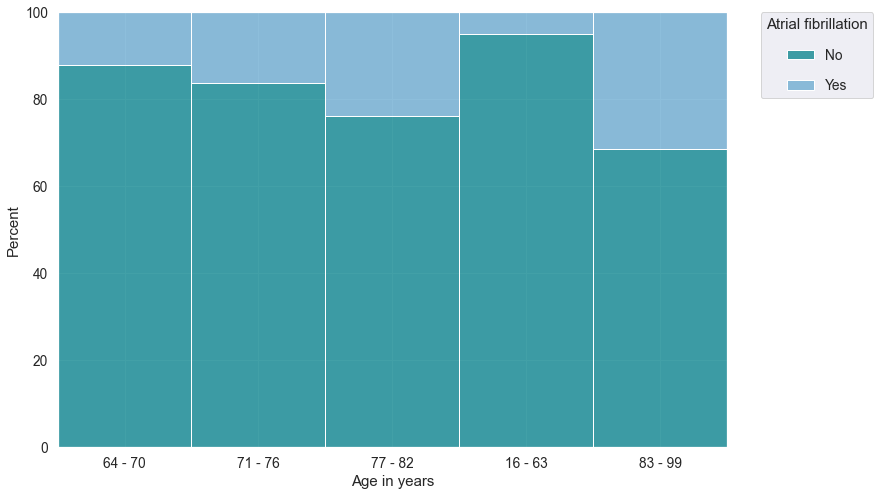

In [19]:
ax = sns.histplot(x = 'AGE_bin',
                 hue= 'RATRIAL',
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_RATRIAL, data = df,
                 )

ax.set(ylabel="Percent")
ax.set(xlabel="Age in years")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,
           labels = ['No', 'Yes'], labelspacing=1.2, title = 'Atrial fibrillation')

plt.savefig("images/patients/ratrial_age_perc.png", bbox_inches="tight")
plt.show()

### Deficits

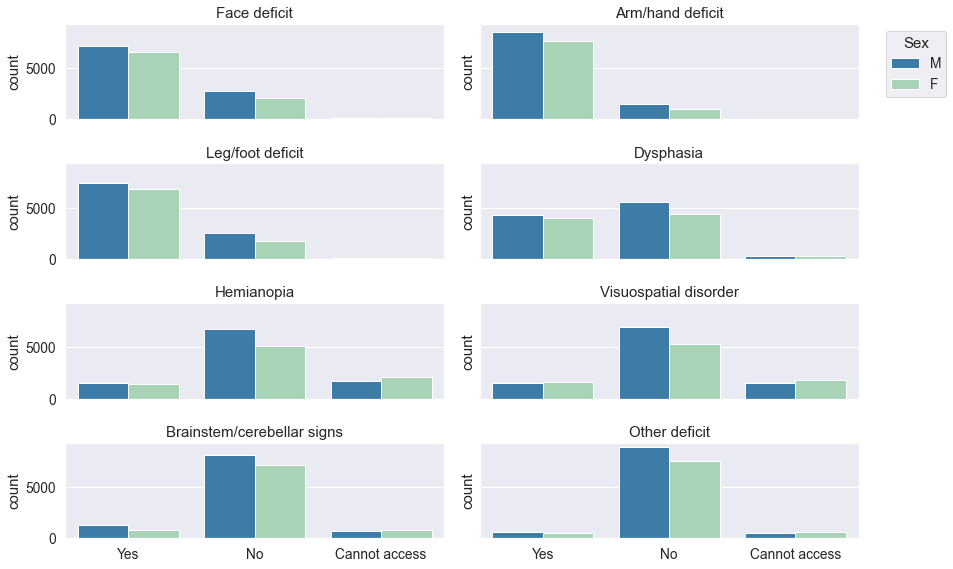

In [20]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(12, 8), sharex=True, sharey=True)
fig.tight_layout(h_pad=2)

sns.countplot(x=df.RDEF1.sort_values(ascending=False), hue = df.SEX, ax = ax1, palette = COLOR_SEX).set_title('Face deficit')
ax1.get_legend().remove()
ax1.set(xlabel=None)
sns.countplot(x=df.RDEF2.sort_values(ascending=False), hue = df.SEX, ax = ax2, palette = COLOR_SEX).set_title('Arm/hand deficit')
ax2.legend(bbox_to_anchor= (1.25, 1), title = 'Sex')
ax2.set(xlabel=None)
sns.countplot(x=df.RDEF3.sort_values(ascending=False), hue = df.SEX, ax = ax3, palette = COLOR_SEX).set_title('Leg/foot deficit')
ax3.get_legend().remove()
ax3.set(xlabel=None)
sns.countplot(x=df.RDEF4.sort_values(ascending=False), hue = df.SEX, ax = ax4, palette = COLOR_SEX).set_title('Dysphasia')
ax4.get_legend().remove()
ax4.set(xlabel=None)
sns.countplot(x=df.RDEF5.sort_values(ascending=False), hue = df.SEX, ax = ax5, palette = COLOR_SEX).set_title('Hemianopia')
ax5.get_legend().remove()
ax5.set(xlabel=None)
sns.countplot(x=df.RDEF6.sort_values(ascending=False), hue = df.SEX, ax = ax6, palette = COLOR_SEX).set_title('Visuospatial disorder')
ax6.get_legend().remove()
ax6.set(xlabel=None)
sns.countplot(x=df.RDEF7.sort_values(ascending=False), hue = df.SEX, ax = ax7, palette = COLOR_SEX).set_title('Brainstem/cerebellar signs')
ax7.get_legend().remove()
ax7.set(xlabel=None)
ax7.set_xticklabels(['Yes', 'No', 'Cannot access'])
sns.countplot(x=df.RDEF8.sort_values(ascending=False), hue = df.SEX, ax = ax8, palette = COLOR_SEX).set_title('Other deficit')
ax8.get_legend().remove()
ax8.set(xlabel=None)
ax8.set_xticklabels(['Yes', 'No', 'Cannot access'])

plt.savefig("images/patients/rdef_stype.png", bbox_inches="tight")

plt.show()

The majority of the participants showed face, arm/hand and leg/foot deficits. A little less than half of the participants had dysphasia. Other severe impairments did not occur as often (hemianopia, visuaspatial disorder, brainstem/cerebellar signs).

Deficit | Description
:--- | :----
Dysphasia | Partial or complete impairment of the ability to communicate resulting from brain injury
Hemianopia | Defective vision or blindness in half of the visual field; usually applied to bilateral defects caused by a single lesion
Visuospatial disorder | Distortion of the visual perception of spatial relationships
Brainstem/cerebellar signs | A cerebellar stroke is one of the less common types of strokes. It occurs when a blood vessel is blocked or bleeding, causing complete interruption to a portion of the cerebellum.

### Diagnosis

The above mentioned deficits are used to classify and eventually diagnose the particular strokes (see a bit further down). We have information on ischaemic strokes only, which also make up the majority of diagnoses. 

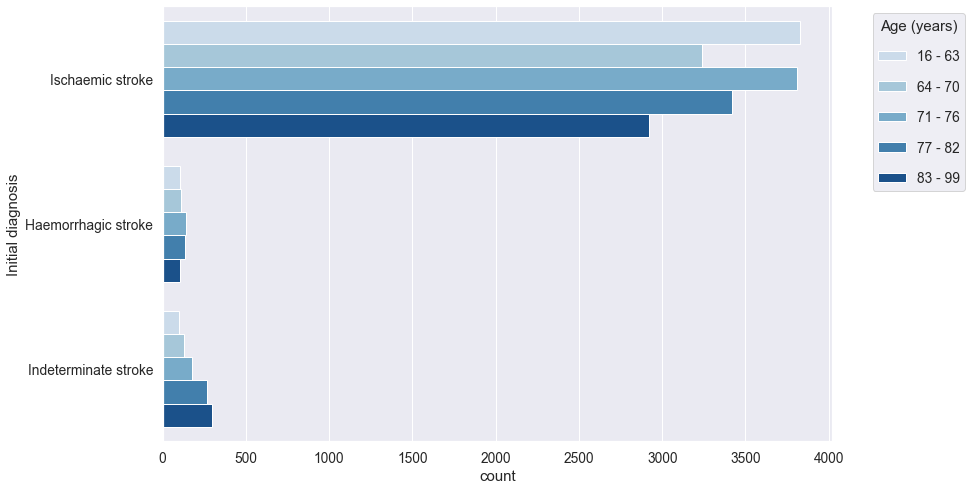

In [21]:
ax = sns.countplot(y = df.DIAGSTR, hue= df.AGE_bin.sort_values(), palette = COLOR_AGE)
ax.set(ylabel="Initial diagnosis")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Age (years)',
           labels = ['16 - 63', '64 - 70', '71 - 76', '77 - 82', '83 - 99'], labelspacing=1.2)

plt.savefig("images/patients/diagstr_age.png", bbox_inches="tight")
plt.show()

In [22]:
# Calculate percentage of patients for each kind of stroke

istr_count = df.DIAG.value_counts()[0] # total number of patients with an ischaemic stroke
ind_count = df.DIAG.value_counts()[1] # total number of patients with an indeterminate stroke
hstr_count = df.DIAG.value_counts()[2] # total number of patients with a haemorraghic stroke

print(f'{round((istr_count/ (istr_count + ind_count + hstr_count) * 100),1)} % patients with an ischaemic stroke')
print(f'{round((ind_count/ (istr_count + ind_count + hstr_count) * 100),1)} % patients with an indeterminate stroke')
print(f'{round((hstr_count/ (istr_count + ind_count + hstr_count) * 100),1)} % patients with a haemorraghic stroke')

91.7 % patients with an ischaemic stroke
5.2 % patients with an indeterminate stroke
3.2 % patients with a haemorraghic stroke


In [23]:
df.DIAGSTR.value_counts()

Ischaemic stroke        17215
Indeterminate stroke      969
Haemorrhagic stroke       595
Name: DIAGSTR, dtype: int64


### Types of ischaemic strokes

#### Total anterior circulation stroke syndrome [(TACS)](https://en.wikipedia.org/wiki/Total_anterior_circulation_infarct)
TACS refers to the symptoms of a patient who clinically appears to have suffered from a total anterior circulation infarct, but who has not yet had any diagnostic imaging (e.g. CT Scan) to confirm the diagnosis.

It is diagnosed when it causes all 3 of the following symptoms:

+ Higher dysfunction
    + Dysphasia (Dysphasia is a partial or complete impairment of the ability to communicate resulting from brain injury.)
    + Visuospatial disturbances (Pertaining to visual perception of spatial relationships.)
    + Decreased level of consciousness   
+ Homonymous hemianopia (Defective vision or blindness in half of the visual field; usually applied to bilateral defects caused by a single lesion.)
+ Motor and sensory defects (≥2/3 of face, arm, leg)


#### Partial anterior circulation stroke syndrome [(PACS)](https://en.wikipedia.org/wiki/Partial_anterior_circulation_infarct) 
PACS refers to the symptoms of a patient who clinically appears to have suffered from a partial anterior circulation infarct, but who has not yet had any diagnostic imaging (e.g. CT Scan) to confirm the diagnosis.

It is diagnosed by any one of the following

+ 2 out of 3 features of
    + Higher dysfunction
        + Dysphasia
        + Visuospatial disturbances
    + Homonymous hemianopia
    + Motor and Sensory Defects (>2/3 of face, arm, leg)
+ Higher dysfunction alone
+ Partial motor or sensory defect
If all of the above symptoms are present, a Total Anterior Circulation Infarct is more likely.

#### Posterior circulation stroke syndrome [(POCS)](https://en.wikipedia.org/wiki/Posterior_circulation_infarct) 
POCS refers to the symptoms of a patient who clinically appears to have had a posterior circulation infarct, but who has not yet had any diagnostic imaging (e.g. CT Scan) to confirm the diagnosis.

It can cause the following symptoms:

+ Cranial nerve palsy AND contralateral motor/sensory defect
+ Bilateral motor or sensory defect
+ Eye movement problems (e.g.nystagmus)
+ Cerebellar dysfunction
+ Isolated homonymous hemianopia
+ Vertigo

It has also been associated with deafness.

#### Lacunar stroke or lacunar cerebral Syndrome [(LACS)](https://en.wikipedia.org/wiki/Lacunar_stroke)
Lacunar stroke is the most common type of ischaemic stroke, resulting from the occlusion of small penetrating arteries that provide blood to the brain's deep structures. Patients who present with symptoms of a lacunar stroke, but who have not yet had diagnostic imaging performed, may be described as suffering from lacunar stroke syndrome (LACS).

Symptoms:
+ Pure motor stroke/hemiparesis (most common lacunar syndrome: 33–50%)
+ Ataxic hemiparesis (second most frequent lacunar syndrome)
+ Dysarthria/clumsy hand (sometimes considered a variant of ataxic hemiparesis, but usually still is classified as a separate lacunar syndrome)
+ Pure sensory stroke
+ Mixed sensorimotor stroke

Hemiparesis is the weakness of one entire side of the body. Hemiplegia is, in its most severe form, complete paralysis of half of the body. In this study those symptoms were reported as face deficit, hand/arm deficit and foot/leg deficit.

True cortical signs (aphasia, visuospatial neglect, gaze deviation, and visual field defects) are always absent in lacunar strokes.


In [24]:
df.STYPE.value_counts()

PACS    7541
TACS    4534
LACS    4505
POCS    2147
OTH       52
Name: STYPE, dtype: int64

PACS was by far the most diagnosed stroke type, followed by TACS and LACS. Fewer patients were diagnosed with POCS. A very small number of patient were not diagnosed with either type of stroke ("OTH"). The relation between these kind of strokes was present in all age groups.

In [25]:
group_age = df.groupby('AGE_bin')
group_age.STYPE.value_counts()

AGE_bin  STYPE
16 - 63  PACS     1529
         LACS     1256
         TACS      661
         POCS      570
         OTH        18
64 - 70  PACS     1352
         LACS      968
         TACS      733
         POCS      419
         OTH         6
71 - 76  PACS     1695
         TACS     1009
         LACS      955
         POCS      455
         OTH        12
77 - 82  PACS     1553
         TACS     1063
         LACS      777
         POCS      417
         OTH         9
83 - 99  PACS     1412
         TACS     1068
         LACS      549
         POCS      286
         OTH         7
Name: STYPE, dtype: int64

In [24]:
# Drop patients with STPYE == 'OTH' (only few patients with this diagnosis)
df_type = df[df['STYPE'] != 'OTH']

In [27]:
df_type.STYPE.unique()

array(['PACS', 'LACS', 'POCS', 'TACS'], dtype=object)

In [25]:
stype_rdef1 = df_type.groupby(['STYPE', 'RDEF1']).size()
stype_rdef1 = stype_rdef1.reset_index(name = 'count')
stype_rdef1 = stype_rdef1.pivot(index = 'RDEF1', columns = 'STYPE', values = 'count')
stype_rdef2 = df_type.groupby(['STYPE', 'RDEF2']).size()
stype_rdef2 = stype_rdef2.reset_index(name = 'count')
stype_rdef2 = stype_rdef2.pivot(index = 'RDEF2', columns = 'STYPE', values = 'count')
stype_rdef3 = df_type.groupby(['STYPE', 'RDEF3']).size()
stype_rdef3 = stype_rdef3.reset_index(name = 'count')
stype_rdef3 = stype_rdef3.pivot(index = 'RDEF3', columns = 'STYPE', values = 'count')
stype_rdef4 = df_type.groupby(['STYPE', 'RDEF4']).size()
stype_rdef4 = stype_rdef4.reset_index(name = 'count')
stype_rdef4 = stype_rdef4.pivot(index = 'RDEF4', columns = 'STYPE', values = 'count')
stype_rdef5 = df_type.groupby(['STYPE', 'RDEF5']).size()
stype_rdef5 = stype_rdef5.reset_index(name = 'count')
stype_rdef5 = stype_rdef5.pivot(index = 'RDEF5', columns = 'STYPE', values = 'count')
stype_rdef6 = df_type.groupby(['STYPE', 'RDEF6']).size()
stype_rdef6 = stype_rdef6.reset_index(name = 'count')
stype_rdef6 = stype_rdef6.pivot(index = 'RDEF6', columns = 'STYPE', values = 'count')
stype_rdef7 = df_type.groupby(['STYPE', 'RDEF7']).size()
stype_rdef7 = stype_rdef7.reset_index(name = 'count')
stype_rdef7 = stype_rdef7.pivot(index = 'RDEF7', columns = 'STYPE', values = 'count')
stype_rdef8 = df_type.groupby(['STYPE', 'RDEF8']).size()
stype_rdef8 = stype_rdef8.reset_index(name = 'count')
stype_rdef8 = stype_rdef8.pivot(index = 'RDEF8', columns = 'STYPE', values = 'count')

As mentioned above the deficits (`RDEFX`) are used to classify the strokes. Here you can see a break down and combination of the deficits and the eventual diagnosis if the participants: 

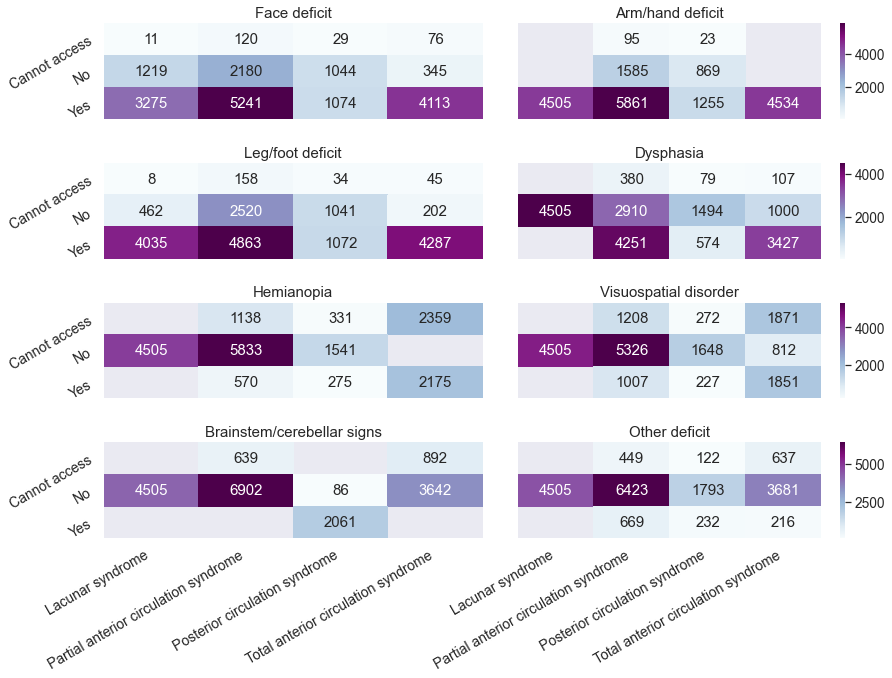

In [43]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(12, 8), sharex=True, sharey=True)
fig.tight_layout(h_pad=2)
ylabels = ['Cannot access', 'No', 'Yes' ]
xlabels = ['Lacunar syndrome', 'Partial anterior circulation syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome']

sns.heatmap(stype_rdef1, annot = True, fmt = '.0f', ax = ax1, cmap="BuPu", cbar = False)
ax1.set(xlabel=None, title = 'Face deficit', ylabel ='')
ax1.set_yticklabels(ylabels, fontsize=14, rotation=30, ha= 'right')

sns.heatmap(stype_rdef2, annot = True, fmt = '.0f', ax = ax2, cmap="BuPu")
ax2.set(xlabel=None, title = 'Arm/hand deficit', yticklabels= ['Cannot access','No','Yes' ], ylabel ='')
ax2.set_yticklabels(ylabels, fontsize=14, rotation=30, ha= 'right')

sns.heatmap(stype_rdef3, annot = True, fmt = '.0f', ax = ax3, cmap="BuPu", cbar = False)
ax3.set(xlabel=None, title = 'Leg/foot deficit', ylabel ='')
ax3.set_yticklabels(ylabels, fontsize=14, rotation=30, ha= 'right')

sns.heatmap(stype_rdef4, annot = True, fmt = '.0f', ax = ax4, cmap="BuPu")
ax4.set(xlabel=None, title = 'Dysphasia', ylabel ='')
ax4.set_yticklabels(ylabels, fontsize=14, rotation=30, ha= 'right')

sns.heatmap(stype_rdef5, annot = True, fmt = '.0f', ax = ax5, cmap="BuPu", cbar = False)
ax5.set(xlabel=None, title = 'Hemianopia',  ylabel ='')
ax5.set_yticklabels(ylabels, fontsize=14, rotation=30, ha= 'right')

sns.heatmap(stype_rdef6, annot = True, fmt = '.0f', ax = ax6, cmap="BuPu")
ax6.set(xlabel=None, title ='Visuospatial disorder', ylabel ='')
ax6.set_yticklabels(ylabels, fontsize=14, rotation=30, ha= 'right')

sns.heatmap(stype_rdef7, annot = True, fmt = '.0f', ax = ax7, cmap="BuPu", cbar = False)
ax7.set(xlabel=None, title = 'Brainstem/cerebellar signs', ylabel ='')
ax7.set_yticklabels(ylabels, fontsize=14, rotation=30, ha= 'right')
ax7.set_xticklabels(xlabels, fontsize=14, rotation=30, ha= 'right')

sns.heatmap(stype_rdef8, annot = True, fmt = '.0f', ax = ax8, cmap="BuPu")
ax8.set(xlabel=None, title = 'Other deficit', ylabel ='')
ax8.set_yticklabels(ylabels, fontsize=14, rotation=30, ha= 'right')
ax8.set_xticklabels(xlabels, fontsize=14, rotation=30, ha= 'right')

plt.savefig("images/patients/rdef_stype_heat.png", bbox_inches="tight")

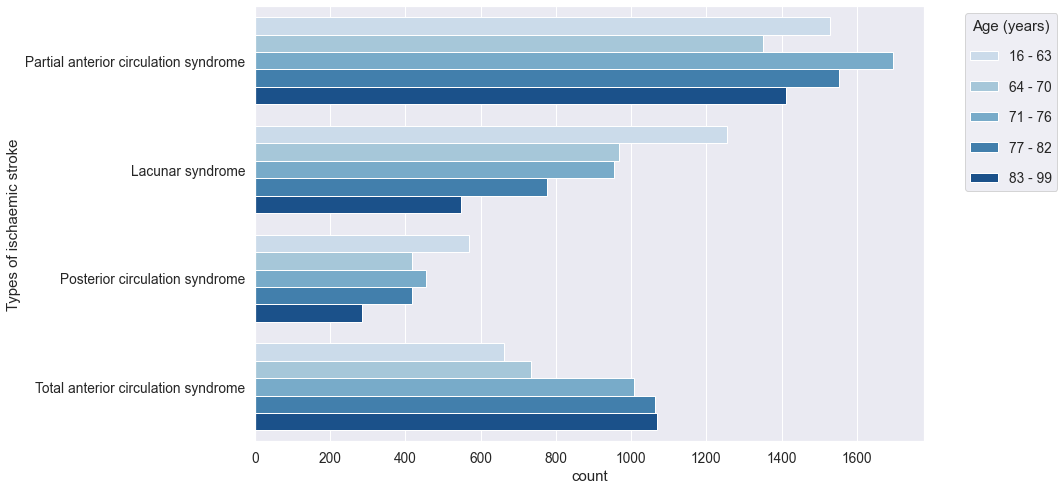

In [27]:
ax = sns.countplot(y = df_type.STYPE, hue= df_type.AGE_bin.sort_values(), palette = COLOR_AGE)
ax.set(ylabel="Types of ischaemic stroke")
ax.set_yticklabels(['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Age (years)',
           labels = ['16 - 63', '64 - 70', '71 - 76', '77 - 82', '83 - 99'], labelspacing=1.2)

plt.savefig("images/patients/stype_age.png", bbox_inches="tight")
plt.show()


In comparison to men, fewer women were diagnosed with LACS and more with PACS.

<ipython-input-28-a9d53c9a12ed>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-28-a9d53c9a12ed>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Male', 'Female'])


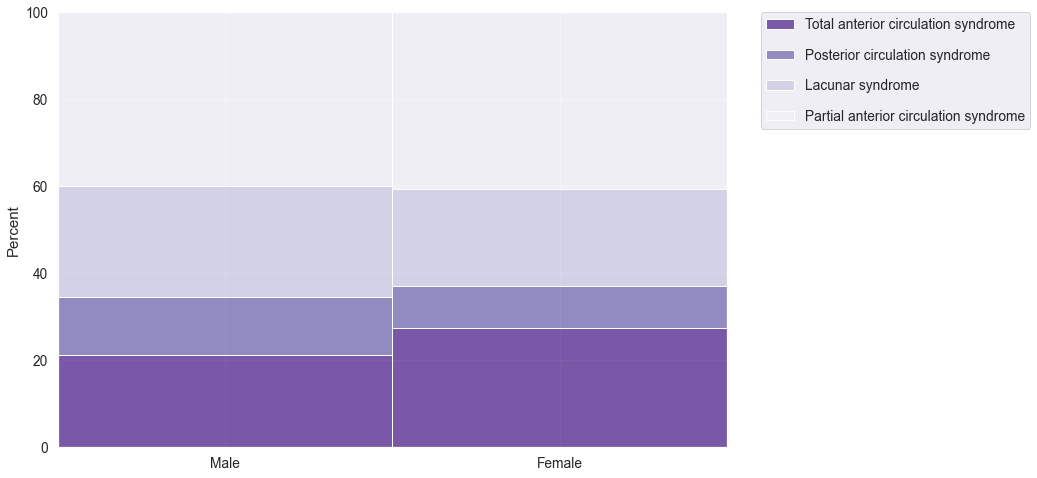

In [28]:
ax = sns.histplot(x = df_type.SEX.sort_values(),
                 hue= df_type.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Total anterior circulation syndrome', 'Posterior circulation syndrome', 'Lacunar syndrome', 'Partial anterior circulation syndrome',], labelspacing=1.2)

plt.savefig("images/patients/sex_stype_perc.png", bbox_inches="tight")
plt.show()

-----

## Information after 14 days


### Surgery

Only few patients received some kind of surgery. IF so, the patients were most likely to get a haemodilution , which is the increase in the volume of plasma in relation to red blood cells; reduced concentration of red blood cells in the circulation.

In [29]:
group_sur = df.groupby(by=['DHAEMD', 'DCAREND', 'DTHROMB'])
group_sur['STYPE'].value_counts()

DHAEMD  DCAREND  DTHROMB  STYPE
N       N        N        PACS     6916
                          TACS     4186
                          LACS     4130
                          POCS     1946
                          OTH        44
                 U        LACS        1
                          PACS        1
                 Y        TACS        6
                          LACS        3
                          PACS        2
                          POCS        1
        U        N        PACS        3
                          LACS        1
        Y        N        PACS       15
                          LACS       14
                          POCS        6
                          TACS        4
U       N        N        PACS        1
        U        N        PACS        5
                          TACS        3
                          LACS        1
                 U        PACS        2
                          POCS        2
                          TACS        2
        

### Recurrent stroke



The minority of the participants suffered a recurrent stroke within 14 days of their initial stroke.

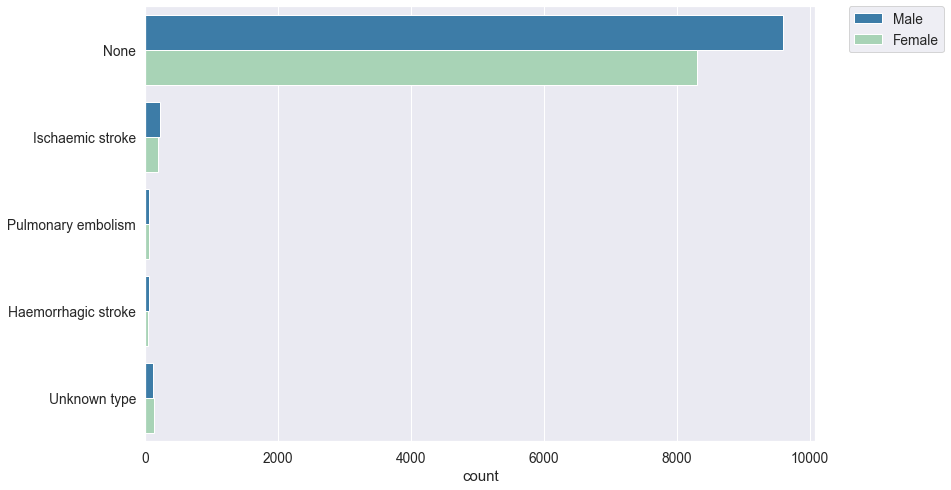

In [30]:
# Another occurrence of a stroke within 14 days of the first one?
# combined RSISC, DRSH, DRSUNK, DPE
ax = sns.countplot(y = df.RDIAG14, hue = df.SEX, palette = COLOR_SEX)

ax.set(ylabel="Recurrent stroke within 14 days")
ax.set(ylabel="")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labels = ['Male', 'Female'])

plt.savefig("images/14_days/rdiag14_sex.png", bbox_inches="tight")
plt.show()

In [31]:
df_rd = df.loc[df['RDIAG14'] != 'None']

Of those few patients who did suffer a recurrent stroke, male participants were more likely to have an ischaemic or haemorrhagic stroke.

<ipython-input-32-f31c873672ce>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


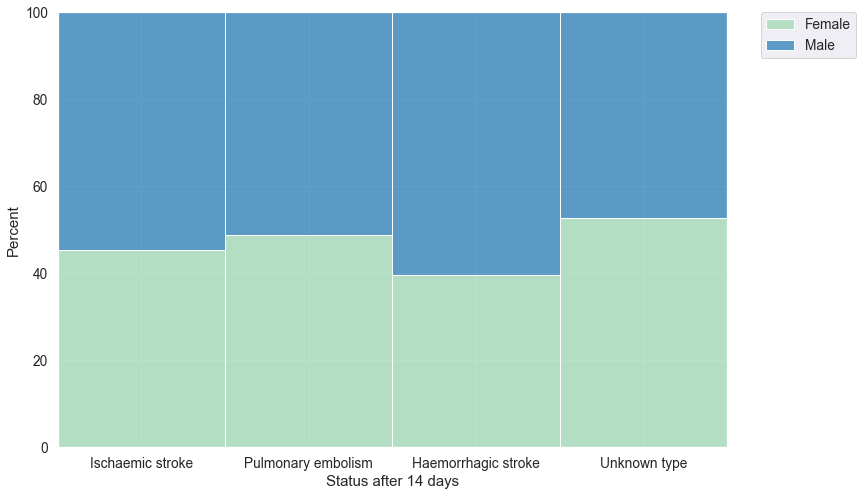

In [32]:
ax = sns.histplot(x = df_rd.RDIAG14,
                 hue= df_rd.SEX,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_SEX
                 )
ax.set(xlabel="Status after 14 days")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labels = ['Female', 'Male'])

plt.savefig("images/14_days/rdiag_sex_perc.png", bbox_inches="tight")
plt.show()

### Medicine beside treatment

Only few participants received other medicine than the study treatment.

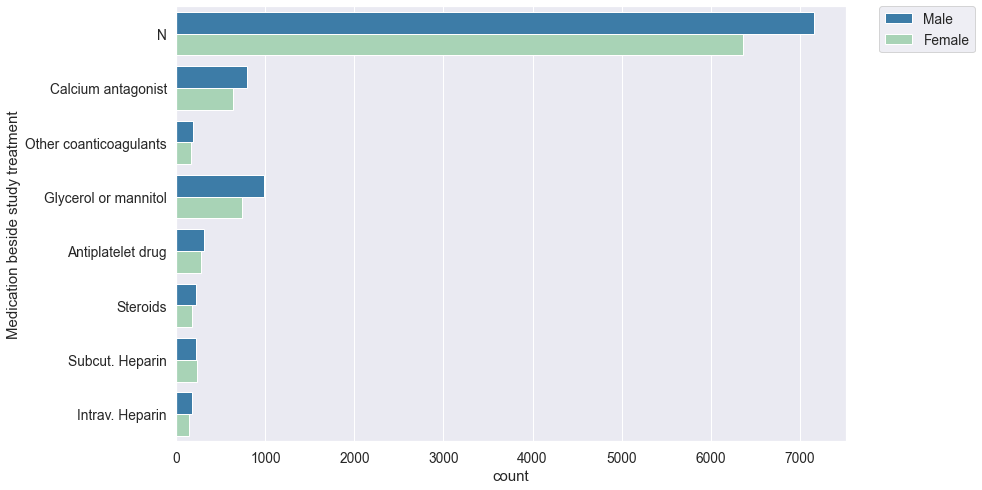

In [40]:
# combi of DSCH, DIVH, DAP, DOAC, DGORM, DSTER and DCAA
ax = sns.countplot(y = df.DMEDS, hue = df.SEX, palette = COLOR_SEX)
ax.set(ylabel="Medication beside study treatment")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labels = ['Male', 'Female'])

### Days on treatment

Most participants took the prescribed medicine for at least 12 days. The majority of the patients that dropped out earlier where discharged from the hospital and a few patients passed away. However, the majority of all patients were not discharged after 14 days. 

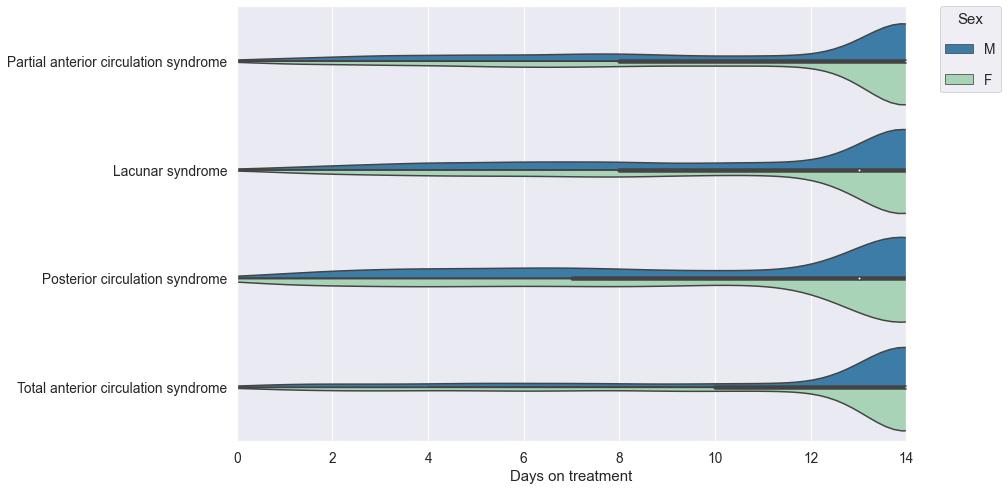

In [41]:
ax = sns.violinplot(y = 'STYPE',x = 'ONDRUG', hue = 'SEX', split = True, data=df_type, palette = COLOR_SEX)

ax.set(xlabel="Days on treatment")
ax.set(ylabel="")
ax.set(xlim = (0,14))
ax.set_yticklabels(['Partial anterior circulation syndrome', 'Lacunar syndrome', 'Posterior circulation syndrome', 'Total anterior circulation syndrome'])


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, title = 'Sex')

plt.savefig("images/14_days/ondrug_stype.png", bbox_inches="tight")
plt.show()


In [42]:
group_disch = df.groupby('RDISCH14')
group_disch.ONDRUG.value_counts()

RDISCH14                        ONDRUG
Dead on discharge form          14.0       384
                                1.0        220
                                3.0        191
                                2.0        164
                                6.0        135
                                5.0        133
                                4.0        120
                                7.0        119
                                8.0        100
                                9.0         95
                                10.0        81
                                12.0        73
                                11.0        68
                                13.0        56
                                0.0         50
Discharged alive from hospital  14.0      3416
                                8.0        637
                                13.0       636
                                7.0        617
                                6.0        580
                     

Younger patients (16 - 63 years) were discharged earlier than older patients. The oldest participants were more likely to be dead after 14 days.

<ipython-input-43-31d27aca8572>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


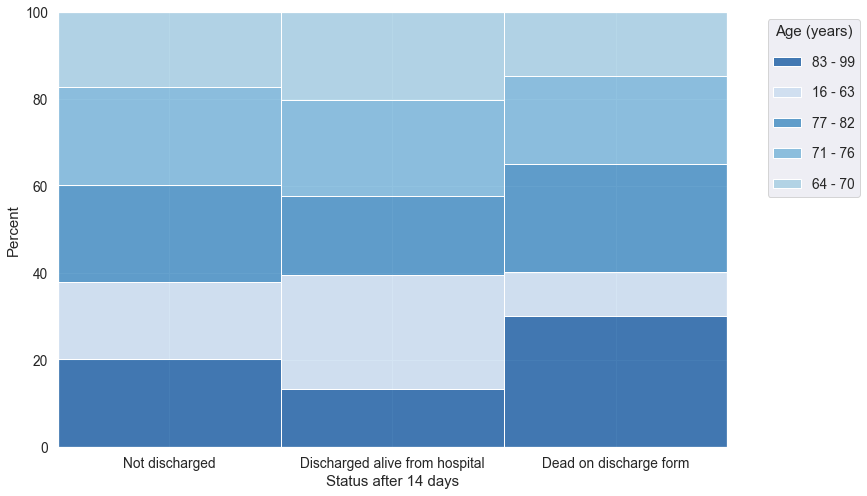

In [43]:
ax = sns.histplot(x = df.RDISCH14,
                 hue= df.AGE_bin.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_AGE
                 )
ax.set(xlabel="Status after 14 days")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Age (years)',
          labels = ['83 - 99', '16 - 63', '77 - 82', '71 - 76', '64 - 70'], labelspacing=1.2)

plt.savefig("images/14_days/rdisch14_age_perc.png", bbox_inches="tight")
plt.show()

A small portion of the participants passed away within 14 days. The majority of those participants who died, suffered a Partial anterior circulation syndrome. Also, patients with the same diagnosis were less likely to be discharged after 14 days.

In [21]:
df.RDISCH14.value_counts()

Discharged alive from hospital    9897
Not discharged                    6893
Dead on discharge form            1989
Name: RDISCH14, dtype: int64

<ipython-input-44-e9f345317b5a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


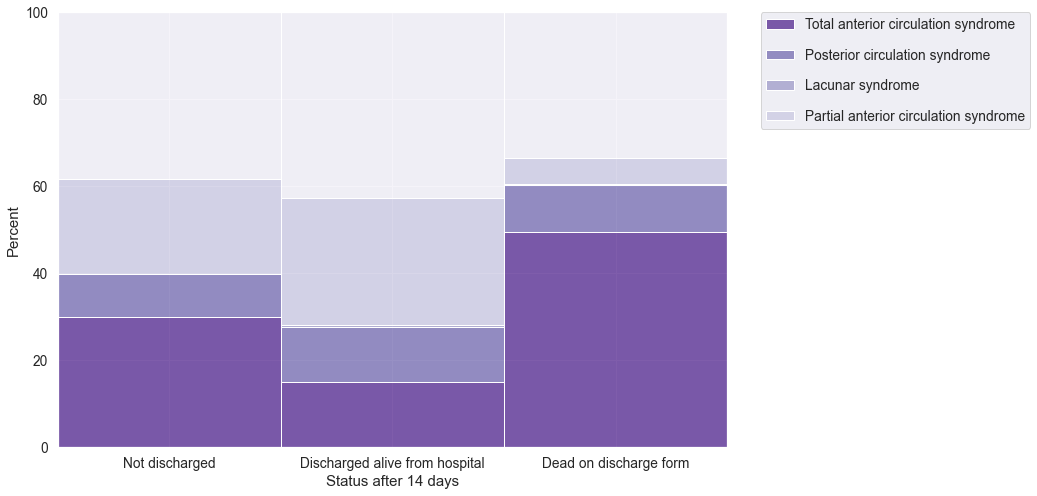

In [44]:
ax = sns.histplot(x = df.RDISCH14,
                 hue= df.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="Status after 14 days")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
#ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Total anterior circulation syndrome', 'Posterior circulation syndrome', 'Lacunar syndrome', 'Partial anterior circulation syndrome',], labelspacing=1.2)

plt.savefig("images/14_days/rdisch14_stype_perc.png", bbox_inches="tight")
plt.show()

More male than female participants were discharged after 14 days.

<ipython-input-45-59cdbfbeaa3a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


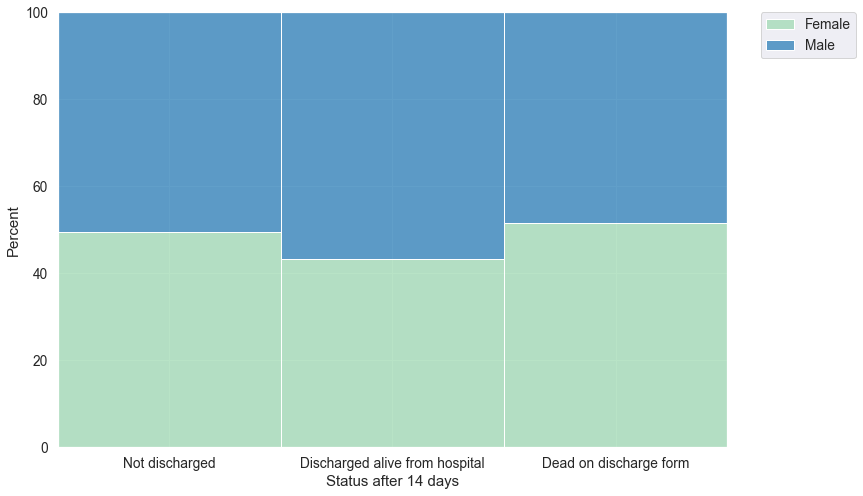

In [45]:
ax = sns.histplot(x = df.RDISCH14,
                 hue= df.SEX,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_SEX
                 )
ax.set(xlabel="Status after 14 days")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labels = ['Female', 'Male'])

plt.savefig("images/14_days/rdisch14_sex_perc.png", bbox_inches="tight")
plt.show()

<ipython-input-20-ceb3b4f18c6e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-20-ceb3b4f18c6e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Male', 'Female'])


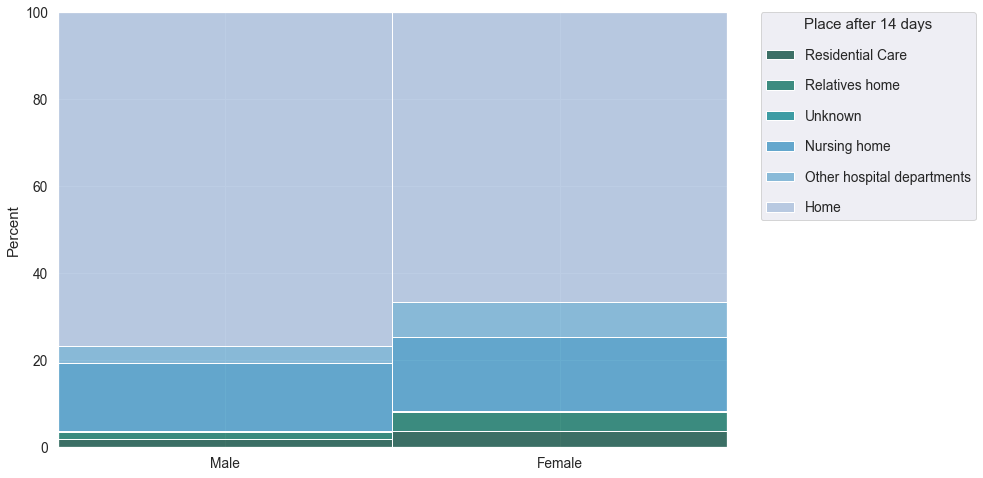

In [20]:
ax = sns.histplot(x = df.SEX,
                 hue= df.DPLACE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_PLACE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title = 'Place after 14 days',
            labels = ['Residential Care', 'Relatives home', 'Unknown', 'Nursing home', 'Other hospital departments', 'Home'], labelspacing=1.2)


plt.savefig("images/14_days/sex_dplace_perc.png", bbox_inches="tight")
plt.show()


More female patients lived in care facilities after 14 days (compared to men). And with increasing age more participants lived in care facilities.

<ipython-input-47-c1ffdbefa572>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


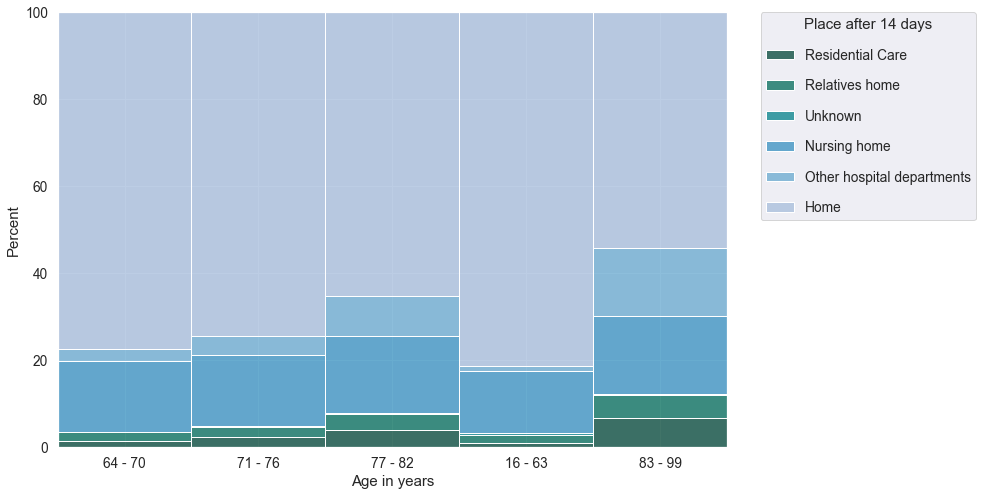

In [47]:
ax = sns.histplot(x = df.AGE_bin.sort_values(),
                 hue= df.DPLACE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_PLACE
                 )
ax.set(xlabel="Age in years")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title = 'Place after 14 days',
            labels = ['Residential Care', 'Relatives home', 'Unknown', 'Nursing home', 'Other hospital departments', 'Home'], labelspacing=1.2)


plt.savefig("images/14_days/age_dplace_perc.png", bbox_inches="tight")
plt.show()

## Information after 6 months

The participants were contaced for a follow-up six months after the randomization. 
+ Information after 6 months
    + Current status
    + Death and cause of death

### Medicine

Most participants were on a antiplatelet drug after 6 months, whereas only a few tool oral anticoagulants.

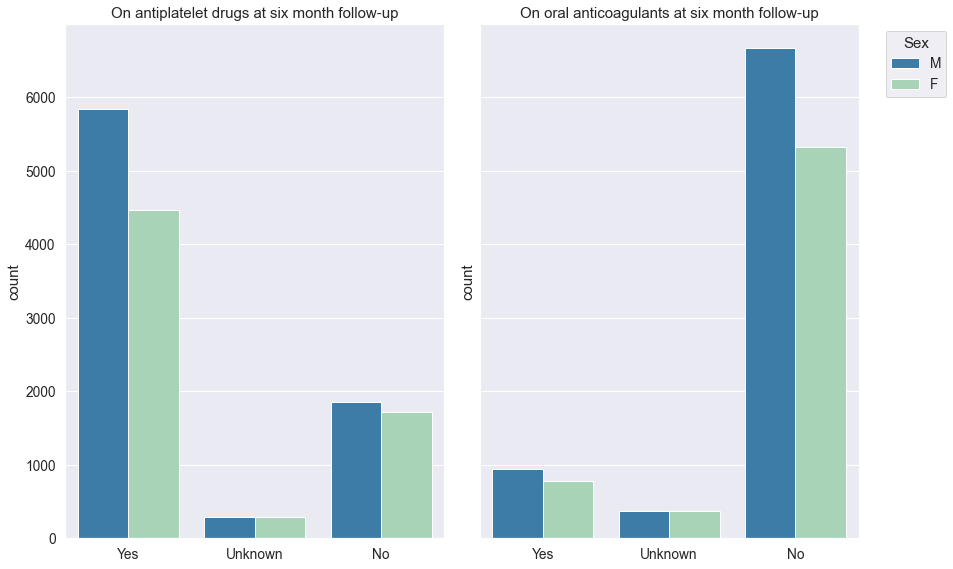

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), sharex=True, sharey=True)
fig.tight_layout(h_pad=2)

sns.countplot(x=df.FAP.sort_values(ascending=False), hue = df.SEX, ax = ax1, palette = COLOR_SEX).set_title('On antiplatelet drugs at six month follow-up')
ax1.get_legend().remove()
ax1.set(xlabel=None)
sns.countplot(x=df.FOAC.sort_values(ascending=False), hue = df.SEX, ax = ax2, palette = COLOR_SEX).set_title('On oral anticoagulants at six month follow-up')
ax2.legend(bbox_to_anchor= (1.25, 1), title = 'Sex')
ax2.set(xlabel=None)

ax1.set_xticklabels(['Yes', 'Unknown', 'No'])
ax2.set_xticklabels(['Yes', 'Unknown', 'No'])

plt.savefig("images/6_months/meds_sex.png", bbox_inches="tight")
plt.show()

### Status of participants

The status of the participants was noted as either "recovered", "not recovered", "dependent" or "dead". As by now, we do not know how the attributes "not recovered" and "dependent" are distinguished.

Most participants that were alive after six months were also dependent, followed by deceased patients. Recovered and not recovered participants made up about 1/3 of all patients. Six months after their stroke more women passed away and are dependent compared to men, whereas a higher percentage of men were recovered and not recovered. 

In [50]:
df_alive = df.loc[df['OCCODE'] != 'Dead']
df_dead = df.loc[df['OCCODE'] == 'Dead']

In [51]:
df.OCCODE.value_counts()

Dependent        7735
Dead             4120
Not recovered    3744
Recovered        3180
Name: OCCODE, dtype: int64

In [52]:
group2 = df.query('OCCODE != "Dead"').groupby('SEX')
print(group2['OCCODE'].value_counts())

SEX  OCCODE       
F    Dependent        3981
     Not recovered    1383
     Recovered        1201
M    Dependent        3754
     Not recovered    2361
     Recovered        1979
Name: OCCODE, dtype: int64


<ipython-input-53-e0b766712174>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-53-e0b766712174>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Male', 'Female'])


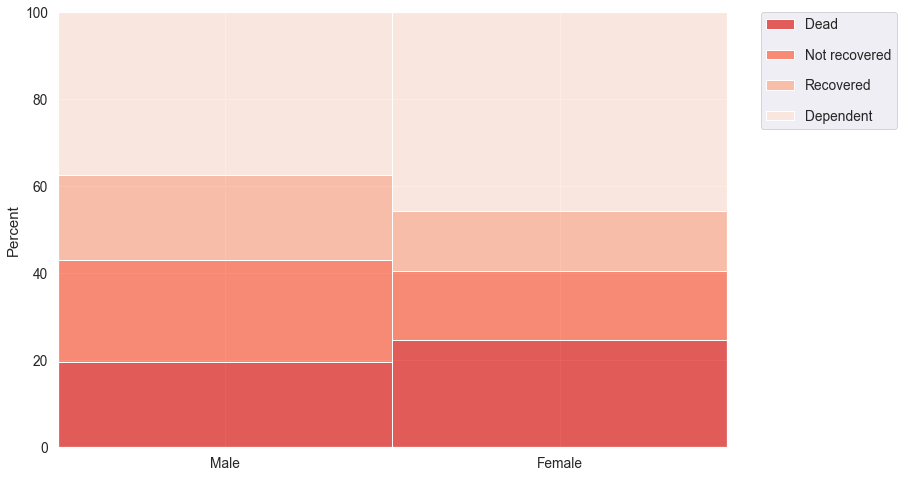

In [53]:
ax = sns.histplot(x = df.SEX,
                 hue= df.OCCODE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_OCCODE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = [ 'Dead', 'Not recovered', 'Recovered','Dependent'], labelspacing=1.2)

plt.savefig("images/6_months/occode_sex_perc.png", bbox_inches="tight")
plt.show()

In particular, patients that suffered a PACS were more likely to have passed away or to be dependent.

<ipython-input-54-a3cf93812b10>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


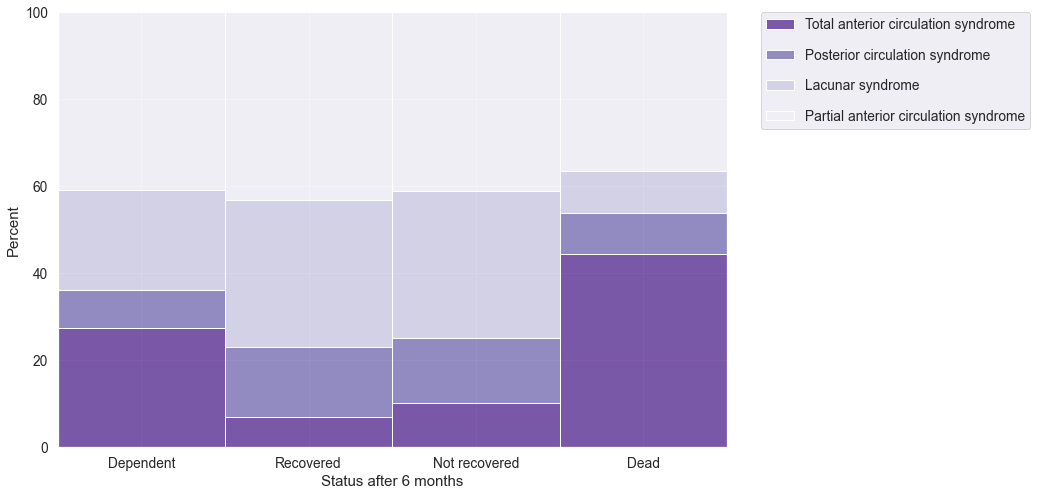

In [54]:
ax = sns.histplot(x = df_type.OCCODE,
                 hue= df_type.STYPE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_STYPE
                 )
ax.set(xlabel="Status after 6 months")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
         labels = ['Total anterior circulation syndrome', 'Posterior circulation syndrome', 'Lacunar syndrome', 'Partial anterior circulation syndrome',], labelspacing=1.2)

plt.savefig("images/6_months/occode_stype_perc.png", bbox_inches="tight")
plt.show()

The majority of the youngest patients (16 to 63 years) either recovered or not. A smaller numbers of these patients were dependent after six months, even less have passed away.

<ipython-input-55-7a02e66e6a0f>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


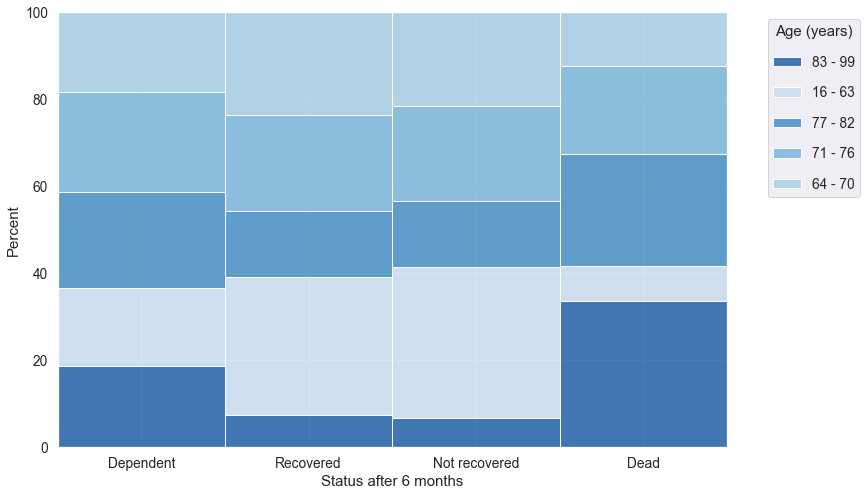

In [55]:
ax = sns.histplot(x = df.OCCODE,
                 hue= df.AGE_bin,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_AGE
                 )
ax.set(xlabel="Status after 6 months")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Age (years)',
          labels = ['83 - 99', '16 - 63', '77 - 82', '71 - 76', '64 - 70'], labelspacing=1.2)

plt.savefig("images/6_months/occode_age_perc.png", bbox_inches="tight")
plt.show()

### Cause of death

The cause of death was the intial stroke for the majority of the participants, followed by pneumonia, a recurrent stroke (ischaemic or unknown) and other vascular (or unknown causes). Particularly, women tended to pass away due to their intial or a recurrent stroke, highlighting the severity of strokes for women.

<ipython-input-56-568a6baa1a48>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-56-568a6baa1a48>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Male', 'Female'])


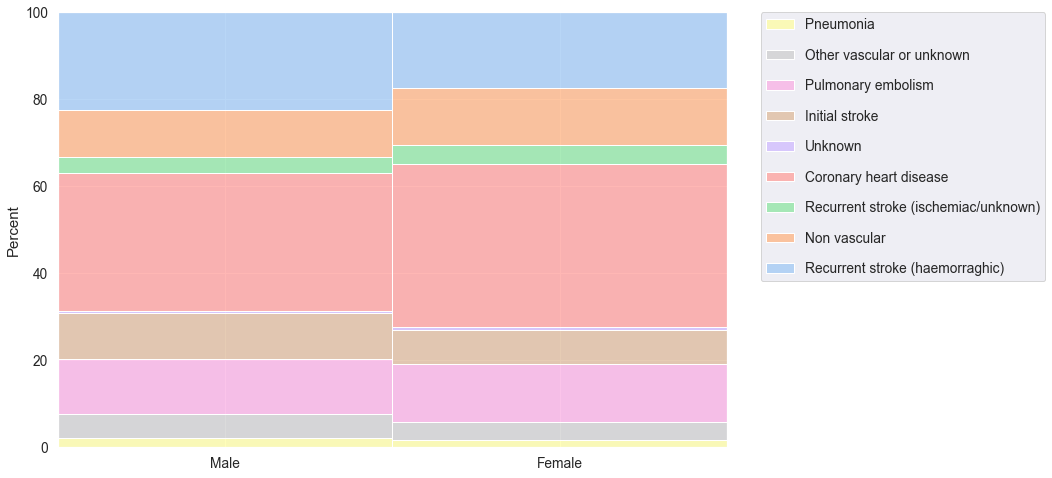

In [56]:
ax = sns.histplot(x = df.SEX,
                 hue= df.FDEADC.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
           labels = ['Pneumonia','Other vascular or unknown','Pulmonary embolism',  'Initial stroke', 'Unknown',
                       'Coronary heart disease', 'Recurrent stroke (ischemiac/unknown)', 'Non vascular', 'Recurrent stroke (haemorraghic)'], labelspacing=1.2)

plt.savefig("images/6_months/sex_fdeadc_perc.png", bbox_inches="tight")
plt.show()

With increasing age we see that more participants have died after six months. Yound patients (16 to 63) were more likely to pass away due to pneumonia. Other than that the causes of death are proportional with age.

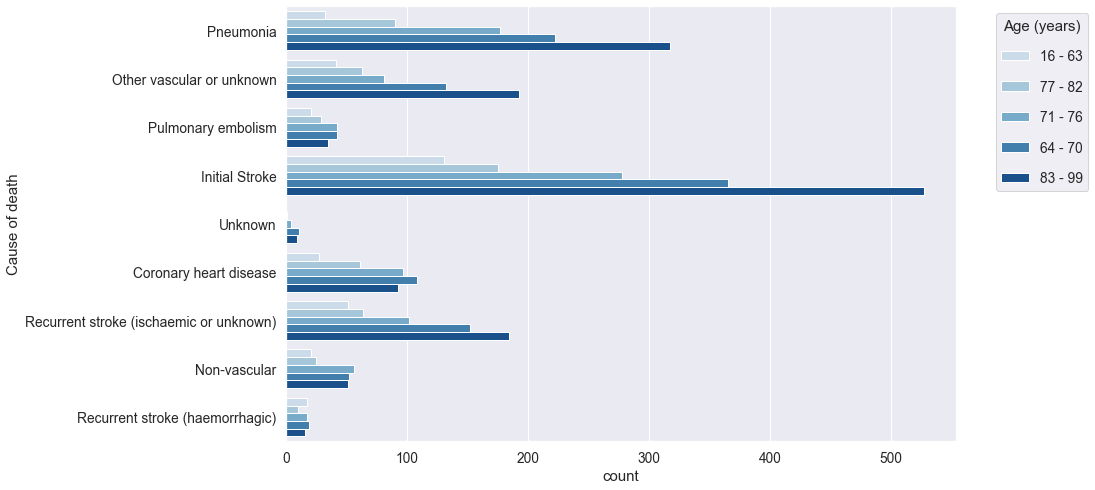

In [57]:
ax = sns.countplot(y = df.FDEADC, hue = df.AGE_bin.sort_values(), palette = COLOR_AGE)
ax.set(ylabel="Cause of death")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Age (years)',
          labels = ['16 - 63', '77 - 82', '71 - 76', '64 - 70', '83 - 99'], labelspacing=1.2)

plt.savefig("images/6_months/age_fdeadc.png", bbox_inches="tight")
plt.show()

<ipython-input-58-880480cc2f27>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


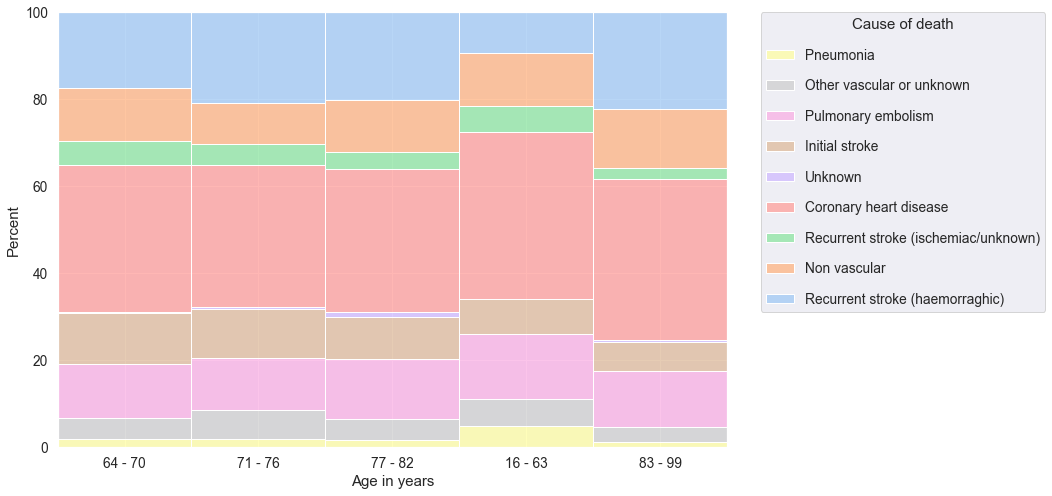

In [58]:
ax = sns.histplot(x = df.AGE_bin,
                 hue= df.FDEADC.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 #palette = COLOR_STATE
                 )
ax.set(xlabel="Age in years")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title = 'Cause of death',
           labels = ['Pneumonia','Other vascular or unknown','Pulmonary embolism',  'Initial stroke', 'Unknown',
                       'Coronary heart disease', 'Recurrent stroke (ischemiac/unknown)', 'Non vascular', 'Recurrent stroke (haemorraghic)'], labelspacing=1.2)

plt.savefig("images/6_months/age_fdeadc_perc.png", bbox_inches="tight")
plt.show()

### Current location

After six months the majority of the participants lived at home. However, women tended to live more often in nursing homes, residential care or relatives homes.

<ipython-input-59-ecaad7bfc219>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
<ipython-input-59-ecaad7bfc219>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Male', 'Female'])


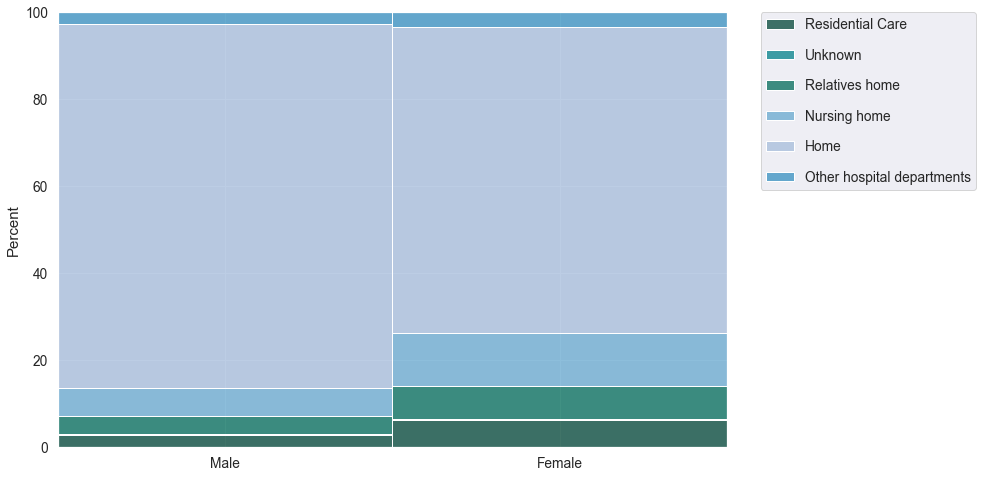

In [59]:
ax = sns.histplot(x = df_alive.SEX,
                 hue= df_alive.FPLACE.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_PLACE
                 )
ax.set(xlabel="")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)
ax.set_xticklabels(['Male', 'Female'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
            labels = ['Residential Care', 'Unknown', 'Relatives home', 'Nursing home', 'Home', 'Other hospital departments'], labelspacing=1.2)

plt.savefig("images/6_months/sex_fplace_perc.png", bbox_inches="tight")
plt.show()

Dependent participants lived more often in care facilities.

<ipython-input-60-a80cc74d6b89>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


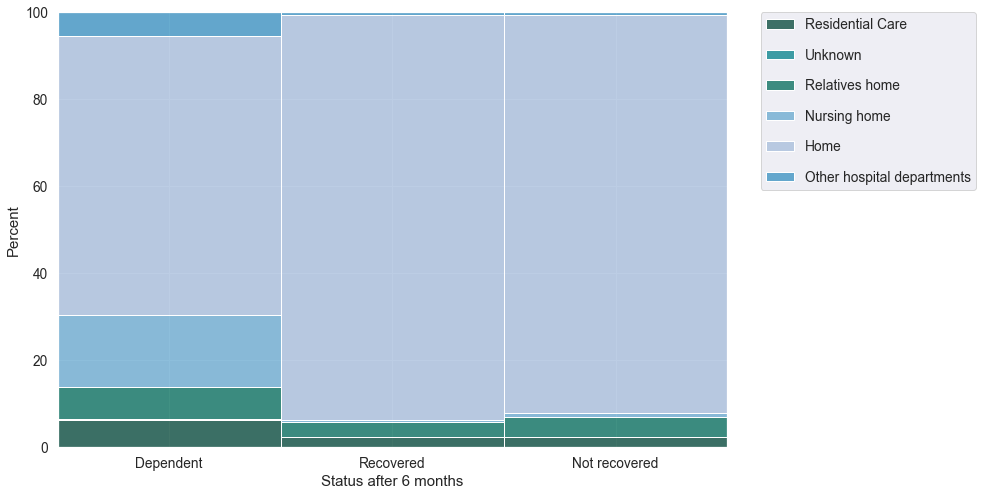

In [60]:
ax = sns.histplot(x = df_alive.OCCODE,
                 hue= df_alive.FPLACE.sort_values(),
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_PLACE
                 )
ax.set(xlabel="Status after 6 months")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
            labels = ['Residential Care', 'Unknown', 'Relatives home', 'Nursing home', 'Home', 'Other hospital departments'], labelspacing=1.2)

plt.savefig("images/6_months/occode_fplace_perc.png", bbox_inches="tight")
plt.show()

With increasing age participants more patients lived in care facilities.

<ipython-input-61-11a56e2df5a9>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


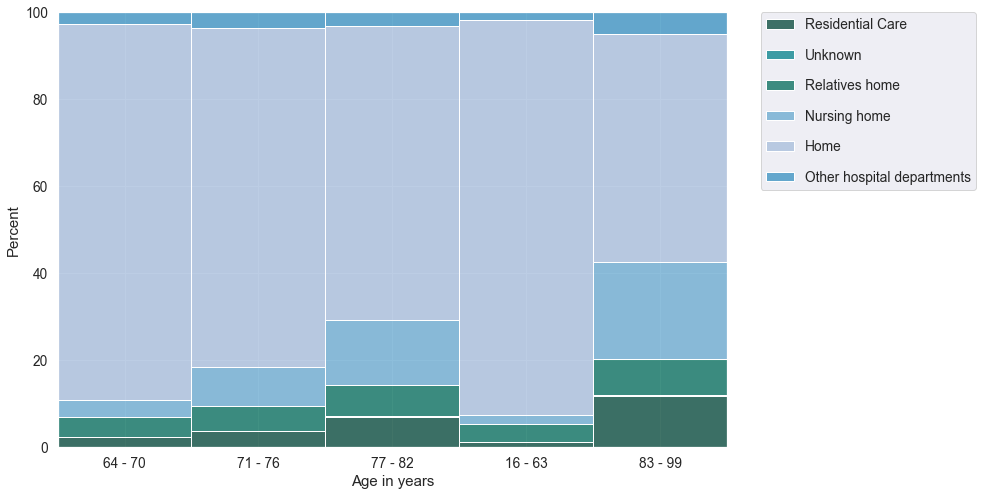

In [61]:
ax = sns.histplot(x = df.AGE_bin,
                 hue= df.FPLACE,
                 stat = 'probability',
                 multiple="fill",
                 palette = COLOR_PLACE
                 )
ax.set(xlabel="Age in years")
ax.set(ylabel="Percent")

ylabels = ['{:,.0f}'.format(y) for y in ax.get_yticks()*100]
ax.set_yticklabels(ylabels)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., 
            labels = ['Residential Care', 'Unknown', 'Relatives home', 'Nursing home', 'Home', 'Other hospital departments'], labelspacing=1.2)


plt.savefig("images/6_months/age_fplace_perc.png", bbox_inches="tight")
plt.show()

## Summary

The age of the participants were distributed over a wide range. However, women tended to be older when they got a stroke. In addition, the older the participants were the more likely they had a abnormal heart rythm. 

Overall only few patients died within 14 days. Only few recurrent strokes happend within the first two weeks. In particular, men suffered ischaemic or haemorrhagic strokes. Most participants were still in hospital after 14 days. If they were discharged, the were most likely to be younger than 63 years.

The majority of all strokes were ischaemic strokes. Only few of those strokes were Lacunar Syndrome, which is surprising as these type of strokes are the most frequent ones. More women than man suffered from Total anterior circulation syndrome (TACS). In fact, participants who did show signs of TACS were more likely to dead within 14 days/6 months or to be dependent after 6 months.

If a participant was discharged, the place they stayed at did not change that much between 14 days and 6 months. Women were more likely to live in residential care, realtives homes, nursing home or hospital compared to their male counterparts (they majority of whome lived at home). This is not surprising when we remind ourselves of the higher life expectancy of women. The younger a patient was the more likely they did stay at home after being discharged.

Patients with lacunar syndrome were less likely to be dead after 6 months, the same holds true for participants younger than 63 years. They were also less likely to be dependent. Participants with TACS were more likely to be dead or dependent after 6 months. This coincides with the fact, that more women than men were dead, not recovered or dependent after 6 months.

The cause of death was similar between men and women. However, more women died due their initial stroke or due to coronary heart disease. Also, younger participants were more likely to die du to pneumonia.